# Real Estate Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Real_Estate_Preprocessed.csv')
df.head()

,Age,Distance to station,Stores,Price,Location
0,32.0,84.87882,10,37.9,3
1,19.5,306.59470,9,42.2,3
2,13.3,561.98450,5,47.3,3
3,13.3,561.98450,5,54.8,3
4,5.0,390.56840,5,43.1,3


In [3]:
# Splitting into Features and Target

X = df.drop('Price', axis=1)
y = df.Price

In [4]:
# Splitting into training & testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating Multiple Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

Reg = LinearRegression()
Reg.fit(X_train_scaled, y_train)
y_pred = Reg.predict(X_train_scaled)

print('R2 Score Training: ',r2_score(y_train, y_pred))
print('RMSE Training: ',np.sqrt(mean_squared_error(y_train, y_pred)))

R2 Score Training:  0.6046162513487015
RMSE Training:  8.319542088911529


In [7]:
from sklearn.feature_selection import f_regression

p_values = f_regression(X_train_scaled, y_train)[1]
p_values = p_values.round(3)
coef = Reg.coef_
features = X.columns.values

Summary = pd.DataFrame()
Summary['Features'] = features
Summary['Coefficient'] = coef
Summary['P Value'] = p_values

Summary

,Features,Coefficient,P Value
0,Age,-2.912630,0.0
1,Distance to station,-5.774866,0.0
2,Stores,4.076878,0.0
3,Location,2.953361,0.0


## Testing

In [8]:
y_test_pred = Reg.predict(X_test_scaled)
print('R2 Score Testing: ', r2_score(y_test_pred, y_test))
print('RMSE Testing: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 Score Testing:  0.6227290853225644
RMSE Testing:  6.019168698727347


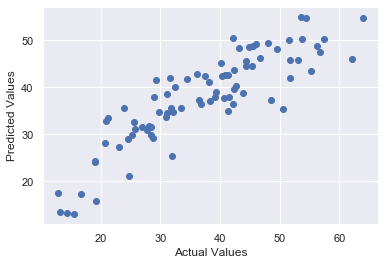

In [9]:
plt.scatter(y_test, y_test_pred);
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show();

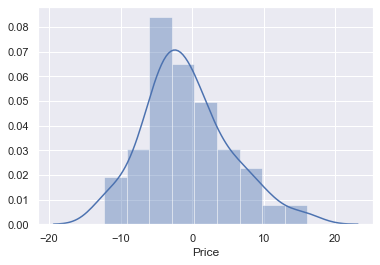

In [10]:
sns.distplot(y_test - y_test_pred);

We can see that error is normally distributed but mean is not exactly 0

In [11]:
Result = pd.DataFrame()
Result['Actual Value'] = y_test
Result['Predicted Value'] = y_test_pred
Result.head()

,Actual Value,Predicted Value
376,56.8,47.453943
170,14.4,13.312979
230,33.4,35.596915
330,15.6,12.937186
336,30.9,33.754020
